## 직접 수집한 Dog, Cat Data로 연습

In [58]:
# Library
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
# read img, prepare data
paths = glob.glob('./drive/MyDrive/imageset/*/*.jpeg')
paths = np.random.permutation(paths)

for img_path in paths:
  img = Image.open(img_path)
  img.resize((50, 50)).save(img_path)

inde = np.array([plt.imread(paths[i]) for i in range(len(paths))])
de = np.array([paths[i].split('/')[4] for i in range(len(paths))])
print(inde.shape, de.shape)

(21, 50, 50, 3) (21,)


In [59]:
de[0:5]

array(['dog', 'dog', 'dog', 'cat', 'dog'], dtype='<U3')

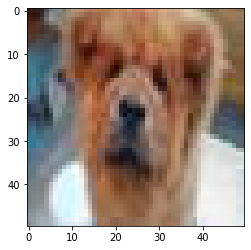

In [60]:
plt.imshow(inde[0])

In [61]:
# reshape data, one-hot-encoding
# inde는 그대로
de = pd.get_dummies(de)
print(inde.shape, de.shape)

(21, 50, 50, 3) (21, 2)


In [76]:
# make model (use LeNet Model)
import tensorflow as tf

X = tf.keras.layers.Input(shape=[50, 50, 3])

H = tf.keras.layers.Conv2D(6, kernel_size=11)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=11)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(2, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [77]:
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 40, 40, 6)         2184      
_________________________________________________________________
batch_normalization_16 (Batc (None, 40, 40, 6)         24        
_________________________________________________________________
activation_16 (Activation)   (None, 40, 40, 6)         0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 20, 20, 6)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 16)        11632     
_________________________________________________________________
batch_normalization_17 (Batc (None, 10, 10, 16)        64  

In [78]:
model.fit(inde, de, epochs=10)

Epoch 1/10
1/1 [==============================] - 7s 7s/step - loss: 1.0482 - accuracy: 0.2381
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 0.4899 - accuracy: 0.7619
Epoch 3/10
1/1 [==============================] - 0s 8ms/step - loss: 0.3003 - accuracy: 0.9048
Epoch 4/10
1/1 [==============================] - 0s 9ms/step - loss: 0.1843 - accuracy: 0.9524
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: 0.1106 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 0.0664 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 0.0404 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 0.0258 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 0.0175 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 7ms/step - loss: 0.0126 - accuracy: 1.0000


In [82]:
pred = model.predict(inde[0:5])
pd.DataFrame(pred).round(2)

,0,1
0,0.01,0.99
1,0.01,0.99
2,0.06,0.94
3,0.42,0.58
4,0.00,1.00


In [83]:
de[0:5]

,cat,dog
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
